## 7. Хорошо обусловленные матрицы

Провести серию экспериментов, тестирующую функции `scipy.linalg.solve`, `numpy.linalg.cond`
на хорошо обусловленных матрицах. Число
обусловленности на следующих классах матриц с ростом порядка матрицы $n$
растет *умеренно*:

* $A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с диагональным преобладанием.

* $A=LL^T$, где $L$ – случайные нижняя треугольная матрица с диагональным преобладанием.

Экспериментальным путем для каждого из перечисленных классов установить
диапазон изменения порядка матрицы, при котором число обусловленности не
превосходит ведичины порядка $10^{16}$. Построить графики значений, выдаваемых
функцией `cond`.
Построить графики используемого этими функциями времени. Для каждой матрицы
задать случайно решение $x$. По матрице $A$ и решению $x$ сгенерировать правую часть 
системы линейных уравнений $b$. Решить систему $Ax=b$, используя команду
`solve`. Построить графики относительной ошибки решения и невязки. Объяснить результаты.

Проведём серию экспериментов на матрицах вида:
* $A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с диагональным преобладанием.

*Числом обусловленности*
невырожденной матрицы $A$ называется величина
$$
{\rm cond} A =  \| A \| \cdot \| A^{-1} \|.
$$
Если матрица $A$ вырождена, то полагают ${\rm cond} A = \infty$.
Из определения следует, что если матричная норма подчинена векторной, то
$$
{\rm cond} A =  {\max_{x\ne 0} \frac{\|A x\|}{\|x\|}} \left/ \,{\min_{x\ne 0}\frac{\|A x\|}{\|x\|}} \right..
$$
Таким образом, число обусловленности – это отношение максимального растяжения матрицы к ее минимальному растяжению.


Говорят, что квадратная матрица $A_{nn}$ обладает свойством диагонального преобладания, если для каждого i=1,..,n

$$
|a_{ii}| =(\sum_{j \ne 1}^{} |a_{ij}|)
$$

Значит, чтобы получить преобладание матриц достаточно просто в диагональные элементы положить число, которое больше суммы модулей остальных. Максимальное число, которого будет достатточно, будет равно n*max_elem, где max_elem - наибольшее число из диапазона генерации элементов матрицы, а n- порядок матрицы.

Для получения нижней треугольной и верхней треугольной матрицы воспользуемся функциями `tril` и `triu`.
`tril` - вернёт массив, у которого элементы выше диагонали равны нулю, а `triu` - массив у которого элементы ниже диагонали равны нулю.

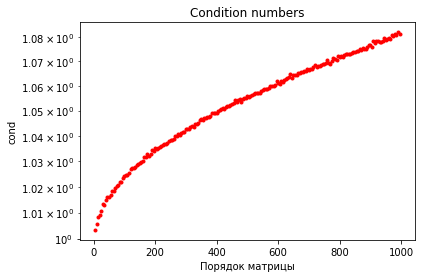

In [80]:
from numpy import random
import scipy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

# для начала посчитаем числа обусловленности и построим по ним график

n_vector = np.arange(5, 1000, 5)
cond_array = []
t=[]
for n in n_vector:
    A=np.random.randint(-30,30,(n,n))
    for i in range(0,n):
        A[i][i]=20000
    L=np.tril(A)
    U=np.triu(A)
    LU=L@U
    # посчитаем число обусловленности и время
    begin=time.monotonic()
    cond_array.append(np.linalg.cond(LU))
    t.append(time.monotonic()-begin)
plt.semilogy(n_vector,cond_array,'.r')
plt.title('Condition numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('cond')
pass

Числа обусловленности получились очень маленькие, в диапазоне $1-1.10$.

Теперь построим график времени для функции `cond`.

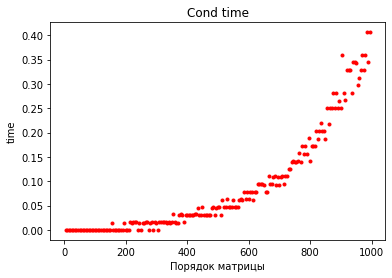

In [81]:
plt.plot(n_vector,t,'.r')
plt.title('Cond time')
plt.xlabel('Порядок матрицы')
plt.ylabel('time')
pass

Посчитаем асимптотику функции `cond`. Эта функция должна вычислить сумму модулей каждой строки - это примерно $n^2$, и вычислить максимальную и минимальную сумму, и найти частное максимального и минмального. Нахождение максимального, минимального и частного, практически не влияют на асимптотику, значит асимптотика - $n^2$. По графику тоже получилось, что асимптотика примерно $n^2$.

Теперь исследуем функцию `solve`. Заодно посчитаем относительные ошибки и невязки.

In [94]:
t_solve=[]
er_array=[]
discr_array=[]
for n in n_vector:
    A=np.random.randint(-30,30,(n,n))
    for i in range(0,n):
        A[i][i]=20000
    L=np.tril(A)
    U=np.triu(A)
    LU=L@U
    x_prec = random.rand(n)# создадим вектор решений системы
    b=LU@x_prec #сгенерируем по x_prec правую часть
    begin=time.monotonic()
    x_comp=linalg.solve(LU,b) # решеним систему LU*x=b
    finish = time.monotonic()-begin
    t_solve.append(finish)
    er=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    er_array.append(er)
    discr=linalg.norm(LU.dot(x_comp) - b)/linalg.norm(b) #вычисление невязки
    discr_array.append(discr)

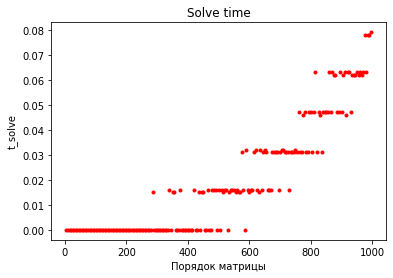

In [95]:
plt.plot(n_vector,t_solve,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

Теперь сравним график с реальной асимптотикой. Функция решает систему методом Гаусса. Т.е. сначала нужно привести матрицу к верхнетреугольному или нижнетреугольному виду. Это делается за $n^2/2$. Затем нужно восстановить все решения по полученной матрице ещё за n. Итого получается $n^3$. По графику сложно сказать, что асимптотика $n^3$. По графику можно заметить, что для относительно небольших матриц время работы равно 0. Компьютер не в состоянии посчитать это время. Для большей наглядности попробуем построить график 
$$
\frac {f(n)}{n^2}
$$
В результате должен получить кубический график повёрнутый на 90 градусов, если асимптотика действительно $n^2$.

Подготовим вектор $t(n) = \frac{f(n)}{n^2}$:

In [96]:
t_3=[]
for i in range (0,len(t_solve)):
    t_3.append(t_solve[i]/n_vector[i]**2)

Теперь построим график, где по оси "у" будет t_3(n)

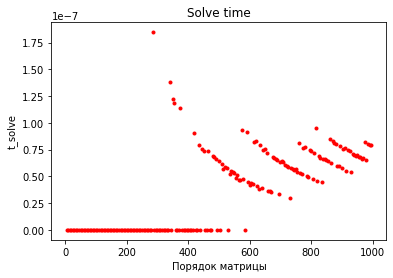

In [97]:
plt.plot(n_vector,t_3,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

Из этого графика уже лучше видно, что время растёт кубически. Так, как много нулевых значений времени, то только половина графика соответствует $x^3$. Другая половина представляет собой прямую у=0.

Построим график относительной ошибки решения.

Пусть $x$ – некоторый вектор в ${\bf R}^n$, а $\widetilde{x}$ – другой вектор в ${\bf R}^n$, рассматриваемый как приближение к $x$. Тогда *абсолютной ошибкой* называется число
$$
   \|\Delta x\| = \|\widetilde{x} - x\|,
$$
а *относительной ошибкой* - число
$$
   \frac{\|\Delta x\|}{\|x\|} = \frac{\|\widetilde{x} - x\|}{\|x\|}.
$$

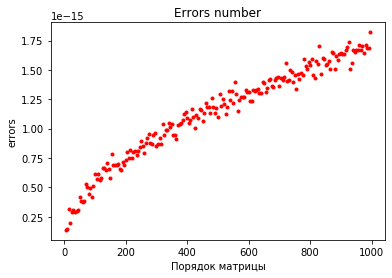

In [98]:
plt.plot(n_vector,er_array,'.r')
plt.title('Errors number')
plt.xlabel('Порядок матрицы')
plt.ylabel('errors')
pass

С увелечинем порядка матрицы растёт и относительная ошибка. Это возникает из-за накопления ошибок округления.

Построим график зависимости относительной невязки $\|Ax - b\|/\|b\|$ от порядка матрицы.

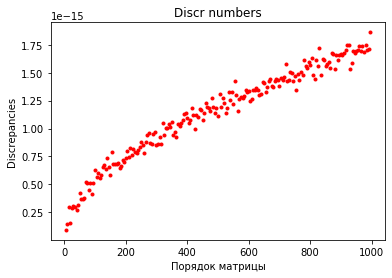

In [99]:
plt.plot(n_vector,discr_array,'.r')
plt.title('Discr numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('Discrepancies')
pass

Для небольших чисел обусловленности получили небольшие относительные невязки.

Проведём серию экспериментов на матрицах вида:
* $A=LL^T$, где $L$ – случайные нижняя треугольная матрица с диагональным преобладанием.
матрицы соответственно с диагональным преобладанием.

В этом эксперименте посчитаем сразу все значения: числа обусловленности, относительные ошибки, невязки и время работы функций, чтобы по много раз не пересоздавать матрицы, одного и того же размера, а првоести на них сразу все эксперименты.
Заодно попробуем увеличить диапазон изменения значения элементов, возможно это приведёт к другим результатам.

In [100]:
cond_array = []
t=[]
t_solve=[]
er_array=[]
discr_array=[]
for n in n_vector:
    L=np.random.randint(-60,60,(n,n))
    for i in range(0,n):
        L[i][i]=30000
    L=np.tril(L)
    LT=L@L.T
    # посчитаем число обусловленности и время
    begin=time.monotonic()
    cond_array.append(np.linalg.cond(LT))
    t.append(time.monotonic()-begin)
    x_prec = random.rand(n)# создадим вектор решений системы
    b=LT@x_prec #сгенерируем по x_prec правую часть
    begin=time.monotonic()
    x_comp=linalg.solve(LT,b) # решеним систему LT*x=b
    finish = time.monotonic()-begin
    t_solve.append(finish)
    er=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    er_array.append(er)
    discr=linalg.norm(LT.dot(x_comp) - b)/linalg.norm(b) #вычисление невязки
    discr_array.append(discr)

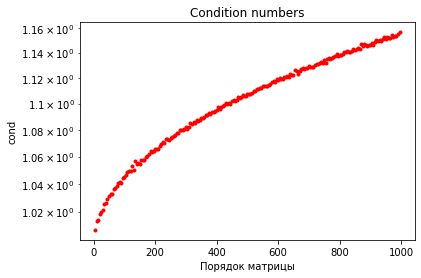

In [101]:
plt.semilogy(n_vector,cond_array,'.r')
plt.title('Condition numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('cond')
pass

Видно, что числа обусловленности немного увеличились, следовательно, при увеличении диапазона изменения элементов матрицы увеличаются и числа обусловленности.

Теперь построим график времени функции `cond`.

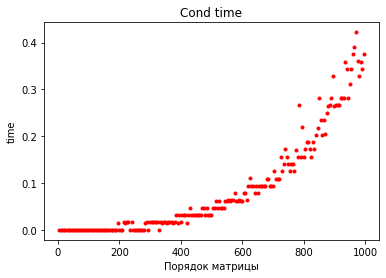

In [102]:
plt.plot(n_vector,t,'.r')
plt.title('Cond time')
plt.xlabel('Порядок матрицы')
plt.ylabel('time')
pass

Время работы `cond` не изменилось.

Теперь построим график работы функции `solve`. Причем построим сразу
$$
\frac {f(n)}{n^2}
$$

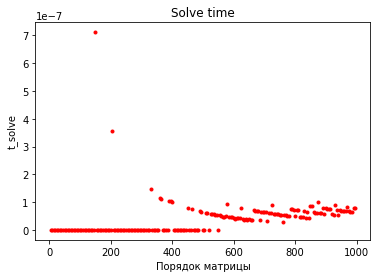

In [103]:
t_3=[]
for i in range (0,len(t_solve)):
    t_3.append(t_solve[i]/n_vector[i]**2)
plt.plot(n_vector,t_3,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

Результаты такие же, как и в первом эксперименте.

Теперь построим графики относительной ошибки и относительной невязки. Так как числа обусловленности осталось такими же маленькими, то и относительные ошибки и относительные невязки не должны были измениться.

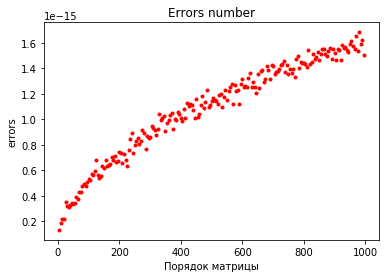

In [104]:
plt.plot(n_vector,er_array,'.r')
plt.title('Errors number')
plt.xlabel('Порядок матрицы')
plt.ylabel('errors')
pass

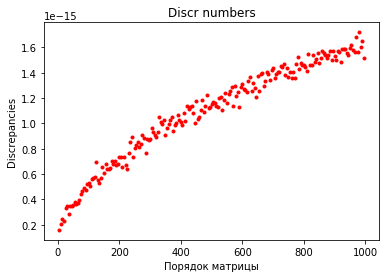

In [105]:
plt.plot(n_vector,discr_array,'.r')
plt.title('Discr numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('Discrepancies')
pass

Действительно, данные остались абсолютно идентичными.

## 8. Плохо обусловленные матрицы

Провести серию экспериментов, тестирующую команды `scipy.linalg.solve`, `numpy.linalg.cond`
на плохо обусловленных матрицах вида
$A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с малыми диагональными элементами.

Как выяснилось на двух предыдущих эскпериментах диапазон изменения элементов влияет на число обусловленности. Для начала зададим диапазон от -30 до 30. К тому же матрицы сами по себе получатся с малыми диагональными элементами. Код ничем не будет отличаться от кода в предыдущих экспериментах. Так же сразу на одних и тех же матрицах проведём все эксперименты.

Подготовим данные для графиков:

In [132]:
n_vector = np.arange(5, 1000, 5) #порядки матриц используемые в соотвествующих тестах
cond_array = []
t=[]
t_solve=[]
er_array=[]
discr_array=[]
for n in n_vector:
    B = np.random.uniform(-30, 30, (n,n))
    L=np.tril(B)
    B = np.random.uniform(-30, 30, (n,n))
    U=np.triu(B)
    LU=L@U
    begin = time.monotonic()
    cond_array.append(np.linalg.cond(LU))
    t.append(time.monotonic()-begin)
    x_prec = random.rand(n)
    b=LU@x_prec
    begin=time.monotonic()
    x_comp=linalg.solve(LU,b)
    t_solve.append(time.monotonic()-begin)
    er_array.append(linalg.norm(x_comp-x_prec)/linalg.norm(x_prec))
    discr_array.append(linalg.norm(LU.dot(x_comp) - b)/linalg.norm(b))
    

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.22254e-18): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.04792e-19): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.41124e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.20217e-19): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.99582e-19): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.82955e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Li

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.96263e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.80265e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.89805e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.09027e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.62629e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.09755e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Li

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.12922e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.08443e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.59601e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.72202e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.45608e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.40001e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Li

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.824e-23): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.19584e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.2632e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.08919e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.30894e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.44273e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAl

Предупреждения свидетельствуют о том, что матрицы плохо обусловлены.

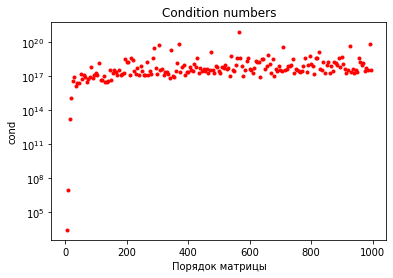

In [133]:
plt.semilogy(n_vector,cond_array,'.r')
plt.title('Condition numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('cond')
pass

Числа обусловленности матрицы получились порядка $10^{17} - 10^{20}$, что свидельтсвует о том, что матрицы плохо обусловлены.

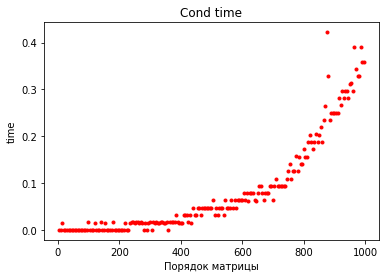

In [134]:
plt.plot(n_vector,t,'.r')
plt.title('Cond time')
plt.xlabel('Порядок матрицы')
plt.ylabel('time')
pass

Время работы функции `cond` остаётся без изменений.

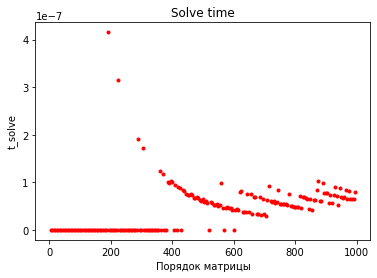

In [135]:
t_3=[]
for i in range (0,len(t_solve)):
    t_3.append(t_solve[i]/n_vector[i]**2)
plt.plot(n_vector,t_3,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

Время работы функции `solve` остаётся без изменений.

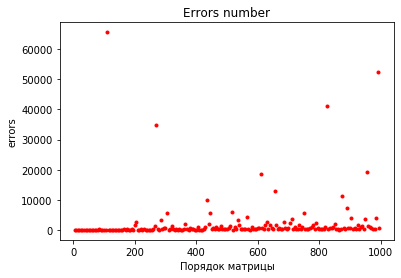

In [136]:
plt.plot(n_vector,er_array,'.r')
plt.title('Errors number')
plt.xlabel('Порядок матрицы')
plt.ylabel('errors')
pass

Из-за большого числа обусловленности относительная ошибка тоже невороятно большая. Следовательно, такие матрицы нельзя решать компьютером, так как точное решение нельзя будет найти. Даже из-за небольшой ошибки округления решение компьютера может кардинально отличаться от действительного решения.

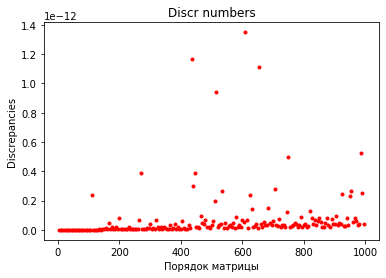

In [137]:
plt.plot(n_vector,discr_array,'.r')
plt.title('Discr numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('Discrepancies')
pass

Выводы из проведённых экспериментов:

1.Время работы функции `cond` и функции `solve` не зависит от диапазона элементов матрицы.

2.Время работы функции `cond` и функции `solve` не зависит от числа обусловленности матрицы.

3.Время работы функции `cond` и функции `solve` зависит от порядка матрицы, причём для `cond` время растёт квадратично, а для функции `solve` время растёт кубически.